In [96]:
import numpy as np
import matplotlib.pyplot as plt

In [97]:
%matplotlib inline

## Problem 1
Write a function which implements Euler's method. Test your function on the IVP:
$$\begin{align}
	\begin{split}
		x' (t)&= x(t) - 2t + 4,\quad 0 \leq t \leq 2, \\
		x(0) &= 0,
	\end{split}
\end{align}$$

where the analytic solution is $x(t) = -2+2t + 2e^t$.

Use the Euler method to numerically approximate the solution with step sizes $h = 0.2, 0.1$, and $0.05.$  Plot the true solution alongside the three approximations.

In [98]:
def euler(f,x0,t,h):
    """Numerically approximates the solution to the IVP:
    
    x'(t) = f(x(t),t)
    x(t0) = x0
    
    using the Euler method.
    Parameters:
        f (function): The right-hand side of the ODE
        x0 ((m,) ndarray): The initial condition
        t ((n,) ndarray): The array of time values
        h (float): The step size 
    Returns:
        ((n,m) ndarray): The approximate solution, where x[i] ≈ x(t_i)
    """
    x = np.zeros(len(t))
    x[0] = x0
    
    for ii in range(1, len(t)):
        x[ii] = x[ii - 1] + h*f(x[ii - 1], t[ii - 1])
    
    return x

In [99]:
# Initialize h-values, colors, and labels
hs = [0.2, 0.1, 0.05]
colors = ["red", "blue", "green"]
labels = ["h=0.2", "h=0.1", "h=0.05"]

# Initialize f, analytic solution, domain, and initial conditions
f = lambda x, t: x - 2*t + 4
analytic_sol = lambda q: -2 + 2*q + 2*np.exp(q)
dom = np.linspace(0, 2, 200)
x0 = 0

# Plot for different h-values
for h, color, label in zip(hs, colors, labels):
    t = np.linspace(0, 2, int(np.floor(2/h)) + 1)
    sol = euler(f, x0, t, h)
    plt.plot(t, sol, color = color, label = label)

# Update plot labels 
plt.plot(dom, analytic_sol(dom), color = "purple", label = "Analytic Sol", ls = "--")
plt.xlabel("t")
plt.ylabel("y")
plt.title("Euler's Method for Problem 1")
plt.legend()
plt.show()

## Problem 2

Write functions that implement the midpoint and fourth-order Runge-Kutta methods. Then, consider again the IVP from Problem 1. Use the Euler, Midpoint, and RK4 methods to approximate the value of the solution for step sizes of $h = 0.2,$ $ 0.1,$ $0.05 $, $0.025,$ and $0.0125.$ Plot the true solution alongside the approximation obtained from each method when $h=0.2$. Then, use `plt.loglog` to create a log-log plot of the relative error $|x(2)-x_n|/{|x(2)|}$ as a function of $h$ for each approximation.

In [100]:
def midpoint(f,x0,t,h): 
    """Numerically approximates the solution to the IVP:
    
    x'(t) = f(x(t),t)
    x(t0) = x0
    
    using the midpoint method.
    Parameters:
        f (function): The right-hand side of the ODE
        x0 ((m,) ndarray): The initial condition
        t ((n,) ndarray): The array of time values
        h (float): The step size
    Returns:
        ((n,m) ndarray): The approximate solution, where x[i] ≈ x(t_i)
    """
    x = np.zeros(len(t))
    x[0] = x0
    
    for ii in range(1, len(t)):
        xi_hat = x[ii - 1] + (h/2)*f(x[ii - 1], t[ii - 1])
        x[ii] = x[ii - 1] + h*f(xi_hat, t[ii - 1] + (h/2))
    
    return x

def rk4(f,x0,t,h): 
    """Numerically approximates the solution to the IVP:
    
    x'(t) = f(x(t),t)
    x(t0) = x0
    
    using a fourth-order Runge-Kutta method.
    Parameters:
        f (function): The right-hand side of the ODE
        x0 ((m,) ndarray): The initial condition
        t ((n,) ndarray): The array of time values
        h (float): The step size 
    Returns:
        ((n,m) ndarray): The approximate solution, where x[i] ≈ x(t_i)
    """
    if type(x0) == int:
        x = np.zeros(len(t))
    else:
        x = np.zeros((len(t), len(x0)))
        
    x[0] = x0
    
    for ii in range(1, len(t)):
        k1 = f(x[ii - 1], t[ii - 1])
        k2 = f(x[ii - 1] + (h/2)*k1, t[ii - 1] + (h/2))
        k3 = f(x[ii - 1] + (h/2)*k2, t[ii - 1] + (h/2))
        k4 = f(x[ii - 1] + h*k3, t[ii])
        x[ii] = x[ii - 1] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
        
    return x 

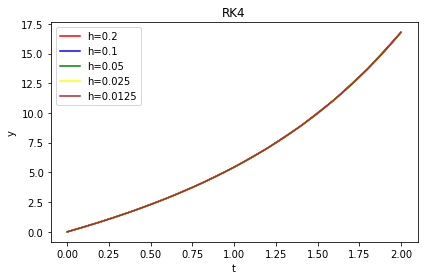

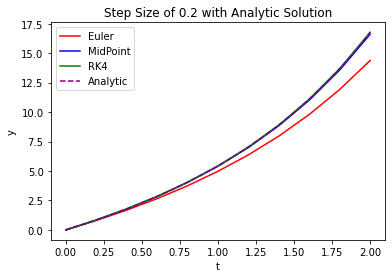

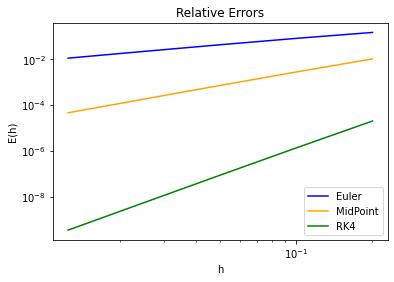

In [101]:
# Initialize h-values, colors, and labels 
hs = [0.2, 0.1, 0.05, 0.025, 0.0125]
colors = ["red", "blue", "green", "yellow", "brown"]
labels = ["h=0.2", "h=0.1", "h=0.05", "h=0.025", "h=0.0125"]

# Initialize f, analytic solution, domain, intial conditions and error lists
f = lambda x, t: x - 2*t + 4
analytic_sol = lambda q: -2 + 2*q + 2*np.exp(q)
dom = np.linspace(0, 2, 200)
x0 = 0
euler_error, mid_error, runga_error = [], [], []

# Plot Euler Method with h-values 
fig0, ax0 = plt.subplots()
for h, color, label in zip(hs, colors, labels):
    t = np.linspace(0, 2, int(np.floor(2/h)) + 1)
    sol_euler = euler(f, x0, t, h)
    ax0.plot(t, sol_euler, color = color, label = label)
    euler_error.append(np.abs(analytic_sol(2) - sol_euler[-1])/np.abs(analytic_sol(2)))

ax0.set_title("Euler")
plt.xlabel("t")
plt.ylabel("y")
plt.tight_layout()
plt.legend()
plt.show()

# Plot MidPoint Method with h-values 
fig, ax1 = plt.subplots()
for h, color, label in zip(hs, colors, labels):
    t = np.linspace(0, 2, int(np.floor(2/h)) + 1)
    sol_mid = midpoint(f, x0, t, h)
    sol_runga = rk4(f, x0, t, h)
    ax1.plot(t, sol_mid, color = color, label = label)
    mid_error.append(np.abs(analytic_sol(2) - sol_mid[-1])/np.abs(analytic_sol(2)))

ax1.set_title("MidPoint")
plt.xlabel("t")
plt.ylabel("y")
plt.tight_layout()
plt.legend()
plt.show()

# Plot RK4 Method with h-values 
fig2, ax2 = plt.subplots()
for h, color, label in zip(hs, colors, labels):
    t = np.linspace(0, 2, int(np.floor(2/h)) + 1)
    sol_runga = rk4(f, x0, t, h)
    ax2.plot(t, sol_runga, color = color, label = label)
    runga_error.append(np.abs(analytic_sol(2) - sol_runga[-1])/np.abs(analytic_sol(2)))
    
ax2.set_title("RK4")
plt.xlabel("t")
plt.ylabel("y")
plt.tight_layout()
plt.legend()
plt.show()


# Plot the methods at h=0.2 with analytic solution
fig3, ax3 = plt.subplots()
dom = np.linspace(0, 2, 200)
t = np.linspace(0, 2, int(np.floor(2/0.2)) + 1)
sol_euler = euler(f, x0, t, 0.2)
sol_mid = midpoint(f, x0, t, 0.2)
sol_runga = rk4(f, x0, t, 0.2)

ax3.plot(t, sol_euler, color = "red", label = "Euler")
ax3.plot(t, sol_mid, color = "blue", label = "MidPoint")
ax3.plot(t, sol_runga, color = "green", label = "RK4")
ax3.plot(dom, analytic_sol(dom), color = "purple", label = "Analytic", ls = "--")

ax3.set_title("Step Size of 0.2 with Analytic Solution")
plt.xlabel("t")
plt.ylabel("y")
plt.legend()
plt.show()

# Plot the relative errors 
fig4, ax4 = plt.subplots()
dom = [0.2, 0.1, 0.05, 0.025, 0.0125]
ax4.loglog(dom, euler_error, color = "blue", label = "Euler")
ax4.loglog(dom, mid_error, color = "orange", label = "MidPoint")
ax4.loglog(dom, runga_error, color = "green", label = "RK4")

plt.xlabel("h")
plt.ylabel("E(h)")
ax4.set_title("Relative Errors")
plt.legend()
plt.show()

## Problem 3

Use the RK4 method to solve for the simple harmonic oscillator satisfying:
$$\begin{align}
	\begin{split}
&{}my'' + ky = 0,\quad 0 \leq t \leq 20, \\
&{}y(0) = 2, \quad
y'(0) = -1,
	\end{split}
\end{align}$$

In [103]:
# Initialize t, initial condtions, f(x(t), t), and h
t = np.linspace(0, 20, int(np.floor(20/.2)) + 1)
x0 = np.array([2, -1])
f1 = lambda x, t: np.array([x[1], -x[0]])
f2 = lambda x, t: np.array([x[1], -x[0]/3])
h = .2

# Solve 
sol1 = rk4(f1, x0, t, h)
sol2 = rk4(f2, x0, t, h)

# Plot 
fig, ax = plt.subplots()
ax.plot(t, sol1[:, 0], color = "blue", label = "m=k=1")
ax.plot(t, sol2[:, 0], color = "black", label = "m=3,k=1")
ax.set_title("Compare m and k Values No Damped System")

plt.legend()
plt.xlabel("t")
plt.ylabel("y")
plt.show()

## Problem 4

Use the RK4 method to solve for the damped free harmonic oscillator satisfying 
$$\begin{align*}
&{}y'' +\gamma y'+ y = 0, \quad 0 \leq t \leq 20,\\
&{}y(0) = 1, \quad
y'(0) = -1.
\end{align*}$$
For $\gamma = 1/2,$ and $\gamma = 1$, simultaneously plot your numerical approximations of $y$.

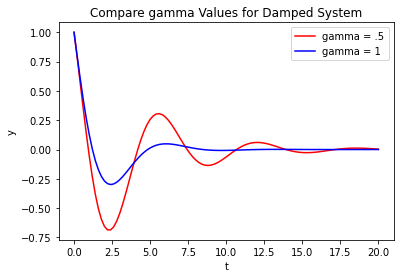

In [104]:
# Initialize t, initial conditions, f(x(t), t), and h-value
t = np.linspace(0, 20, int(np.floor(20/.2)) + 1)
x0 = np.array([1, -1])
f1 = lambda x, t: np.array([x[1], -.5*x[1]-x[0]])
f2 = lambda x, t: np.array([x[1], -x[1]-x[0]])
h = .2

# Solve
sol3 = rk4(f1, x0, t, h)
sol4 = rk4(f2, x0, t, h)

# Plot 
fig, ax = plt.subplots()
ax.plot(t, sol3[:, 0], color = "red", label = "gamma = .5")
ax.plot(t, sol4[:, 0], color = "blue", label = "gamma = 1")
ax.set_title("Compare gamma Values for Damped System")

plt.legend()
plt.xlabel("t")
plt.ylabel("y")
plt.show()

## Problem 5

Use the RK4 method to solve for the damped and forced harmonic oscillator satisfying 
\begin{align}
	\begin{split}
&{}2y'' + \gamma y' + 2y = 2 \cos (\omega t), \quad 0 \leq t \leq 40,\\
&{}y(0) = 2, \quad
y'(0) = -1. 
	\end{split}
	\label{ivp:damped_forced_oscillator}
\end{align}
For the following values of $\gamma$ and $\omega,$ plot your numerical approximations of $y(t)$: $(\gamma, \omega) = (0.5, 1.5),$ $(0.1, 1.1),$ and $(0, 1)$.

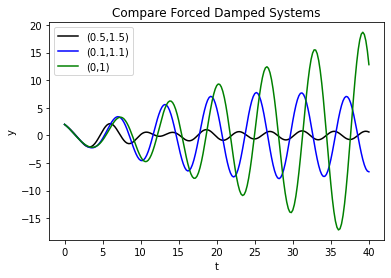

In [105]:
# Initialize t, initial conditions, f(x(t), t), and h-value 
t = np.linspace(0, 40, int(np.floor(40/.2)) + 1)
x0 = np.array([2, -1])
f1 = lambda x, t: np.array([x[1], (2*np.cos(1.5*t) - .5*x[1] - 2*x[0])/2])
f2 = lambda x, t: np.array([x[1], (2*np.cos(1.1*t) - .1*x[1] - 2*x[0])/2])
f3 = lambda x, t: np.array([x[1], (2*np.cos(1*t) - 0*x[1] - 2*x[0])/2])
h = .2

# Solve 
sol5 = rk4(f1, x0, t, h)
sol6 = rk4(f2, x0, t, h)
sol7 = rk4(f3, x0, t, h)

# Plot 
fig, ax = plt.subplots()
ax.plot(t, sol5[:, 0], color = "black", label = "(0.5,1.5)")
ax.plot(t, sol6[:, 0], color = "blue", label = "(0.1,1.1)")
ax.plot(t, sol7[:, 0], color = "green", label = "(0,1)")
ax.set_title("Compare Forced Damped Systems")

plt.legend()
plt.xlabel("t")
plt.ylabel("y")
plt.show()